# Epsilon Greedy

In [180]:
from environment import bandit_env
import numpy as np

np.random.seed(10)

def argmax(reward):
    max_reward = reward[0]
    ties = [0]

    for idx, i in enumerate(reward[1:]):
        if i > max_reward:
            max_reward = i
            ties = [idx+1]
        if i == max_reward:
            ties.append(idx+1)
    
    if len(ties) > 1:
        index_of_max = np.random.choice(ties)
    else:
        index_of_max = ties[0]
    
    return index_of_max

# create bandit_env
q_mean = [2.5, -3.5, 1.0, 5.0, -2.5] 
q_stddev = [0.33, 1.0, 0.66, 1.98, 1.65] 

arm_bandit_env = bandit_env(q_mean, q_stddev)

print("Number of levers: ",arm_bandit_env.n)
print("Mean of each lever: ",arm_bandit_env.r_mean)
print("Standard Deviation of each lever: ",arm_bandit_env.r_stddev)

# implement e greedy policy
def e_greedy(rewards, e):
    # choose random action with probability e
    if np.random.rand() < e:
        return np.random.randint(0, len(rewards))

    # choose greedy action with probability 1-e
    else:
        return argmax(rewards)

average_rewards = np.zeros(6)

epsilons = [1/128, 1/64, 1/32, 1/16, 1/8, 1/4]
for idx, e in enumerate(epsilons):
    actual_reward = 0
    actions = [0, 0, 0, 0, 0]
    rewards = [0, 0, 0, 0, 0]

    for i in range(1000):
        action = e_greedy(rewards, e)
        reward = arm_bandit_env.pull(action)
        actual_reward += reward
        
        actions[action] += 1

        rewards[action] = rewards[action] + (1/(actions[action])) * (reward - rewards[action])
    # print(rewards)
    average_rewards[idx] = actual_reward/1000
print(epsilons)
print(average_rewards)

Number of levers:  5
Mean of each lever:  [2.5, -3.5, 1.0, 5.0, -2.5]
Standard Deviation of each lever:  [0.33, 1.0, 0.66, 1.98, 1.65]
[0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25]
[4.5033535  4.69147178 4.72226565 4.80731172 4.56047084 3.80043579]


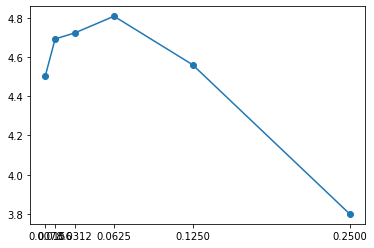

In [181]:
import matplotlib.pyplot as plt
# plt.figure(figsize = (20,10))
plt.scatter(epsilons ,average_rewards)
plt.plot(epsilons, average_rewards)
plt.xticks(epsilons)
plt.show()

# Optimistic Greedy

In [182]:
from environment import bandit_env
import numpy as np

np.random.seed(10)

average_rewards = np.zeros(5)
initial_values = [1/4,1/2,1,2,4]
avg = [0]*5
for idx, val in enumerate(initial_values):
    actual_reward = 0
    rewards = [val]*5
    # print(rewards)
    for i in range(1000):   

        action = argmax(rewards)
        reward = arm_bandit_env.pull(action)
        actual_reward += reward

        rewards[action] = rewards[action] + (0.1) * (reward - rewards[action])
    average_rewards[idx] = actual_reward/1000
    # print(rewards)
    # print()
print(average_rewards)

[2.485711   4.89334895 2.4848475  4.87448844 5.08271821]


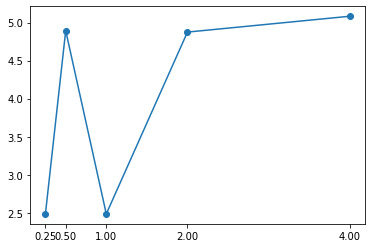

In [183]:
import matplotlib.pyplot as plt
# plt.figure(figsize = (20,10))
plt.scatter(initial_values, average_rewards)
plt.plot(initial_values, average_rewards)
plt.xticks(initial_values)
plt.show()

# UCB 

In [206]:
from environment import bandit_env
import numpy as np

np.random.seed(10)

actions = [0, 0, 0, 0, 0]
average_rewards = [0]*6
rewards = [0, 0, 0, 0, 0]

c = [1/16, 1/4, 1/2, 1, 2, 4]

# play each action once
for i in range(5):
    action = i
    reward = arm_bandit_env.pull(action)
    actions[action] += 1
    rewards[action] = rewards[action] + (1/(actions[action])) * (reward - rewards[action])
# print(rewards)

for idx, val in enumerate(c):
    actual_reward = 0
    for i in range(1,1001):   
        vals = []
        # if i == 0:
            # action = argmax(rewards)
        # else:
        for index in range(len(actions)):
            vals.append(rewards[index] + val*np.sqrt((np.log(i))/(actions[index])))
        action = argmax(vals)
        reward = arm_bandit_env.pull(action)
        actual_reward += reward
        actions[action] += 1
        rewards[action] = rewards[action] + (1/(actions[action])) * (reward - rewards[action])
    average_rewards[idx] = actual_reward/1000
print(average_rewards)

[4.976869767447163, 5.023445110608497, 4.894246442145552, 4.956364967996154, 5.027212810860878, 4.98309757077188]


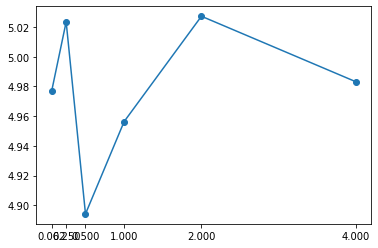

In [207]:
import matplotlib.pyplot as plt
# plt.figure(figsize = (20,10))
plt.scatter(c, average_rewards)
plt.plot(c, average_rewards)
plt.xticks(c)
plt.show()

# Gradient Bandit

# Useless

In [1]:
import numpy as np

## Initialization

In [2]:
# 5 bandits
q = [2.5, -3.5, 1.0, 5.0, -2.5] # actual mean of distribution
std = [0.33, 1.0, 0.66, 1.98, 1.65] # actual standard deviation of distribution

## Setting up the enviroment

In [3]:
from environment import bandit_env # upload environment.py

In [4]:
bandits = bandit_env(q, std)

In [5]:
bandits.r_mean

[2.5, -3.5, 1.0, 5.0, -2.5]

In [6]:
bandits.r_stddev

[0.33, 1.0, 0.66, 1.98, 1.65]

In [7]:
bandits.n

5

In [8]:
def argmax(reward):
    max_reward = reward[0]
    ties = [0]

    for idx, i in enumerate(reward[1:]):
        if i > max_reward:
            max_reward = i
            ties = [idx+1]
        if i == max_reward:
            ties.append(idx+1)
    
    if len(ties) > 1:
        index_of_max = np.random.choice(ties)
    else:
        index_of_max = ties[0]
    
    return index_of_max


In [9]:
cnts = [0]*5
rewards = [0, 0, 0, 0, 0]
for i in range(1000):
    cnts[argmax(rewards)] += 1
cnts

[201, 192, 212, 189, 206]

## Epsilon greedy

In [10]:
def epsilon_greedy(rewards, epsilon):
    if np.random.rand() < epsilon:
        return np.random.choice(5)
    else:
        return argmax(rewards)

In [24]:
np.array([1,1,1,1]) + [1.2,2,3,4]

array([2.2, 3. , 4. , 5. ])

In [32]:
from tqdm import tqdm

actual_average_reward = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0])


for i in tqdm(range(100)):
    epsilons = [1/128, 1/64, 1/32, 1/16, 1/8, 1/4]
    avg_reward = []

    for e in epsilons:  
        rewards = np.zeros(5)
        actions = np.zeros(5)
        for i in range(1000):
            action = epsilon_greedy(rewards, e)
            rewards[action] += bandits.pull(action)
            actions[action] += 1
            rewards[action] /= actions[action]
        # rewards = rewards/1000
        # print(np.sum(rewards))

        avg_reward.append(np.sum(rewards)/len(rewards))
        # print(avg_reward)
    actual_average_reward += avg_reward
actual_average_reward /= 100

100%|██████████| 100/100 [00:08<00:00, 11.31it/s]


## Plotting

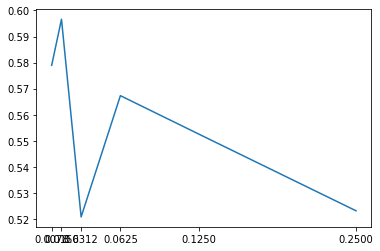

[0.20177094525372605,
 0.990694302606937,
 0.9564305665688322,
 0.202246064031926,
 0.1996880189218282,
 0.7704684879550702]

In [33]:
import matplotlib.pyplot as plt
# plt.scatter(epsilons ,avg_reward)
plt.plot(epsilons, actual_average_reward)
plt.xticks(epsilons)
plt.show()
avg_reward